In [ ]:
import pandas as pd

# Define file paths (Update these if filenames change)
file_paths = {
    "Employee": "/content/Employee.xlsx",
    "PerformanceRating": "/content/PerformanceRating.xlsx",
    "RatingLevel": "/content/RatingLevel.xlsx",
    "SatisfiedLevel": "/content/SatisfiedLevel.xlsx",
    "EducationLevel": "/content/EducationLevel.xlsx"
}

# Load all datasets into a dictionary
dataframes = {name: pd.read_excel(path) for name, path in file_paths.items()}

# Verify successful loading by displaying dataset shapes
for name, df in dataframes.items():
    print(f"{name}: {df.shape}")

Employee: (1470, 23)
PerformanceRating: (6709, 11)
RatingLevel: (5, 2)
SatisfiedLevel: (5, 2)
EducationLevel: (5, 2)


In [ ]:
# Function to summarize datasets
def dataset_summary(dfs):
    for name, df in dfs.items():
        print(f"Summary for: {name}")
        print(df.info())
        print("Missing Values:\n", df.isnull().sum())
        print("Duplicates:", df.duplicated().sum(), "\n")

dataset_summary(dataframes)

Summary for: Employee
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   EmployeeID               1470 non-null   object        
 1   FirstName                1470 non-null   object        
 2   LastName                 1470 non-null   object        
 3   Gender                   1470 non-null   object        
 4   Age                      1470 non-null   int64         
 5   BusinessTravel           1470 non-null   object        
 6   Department               1470 non-null   object        
 7   DistanceFromHome (KM)    1470 non-null   int64         
 8   State                    1470 non-null   object        
 9   Ethnicity                1470 non-null   object        
 10  Education                1470 non-null   int64         
 11  EducationField           1470 non-null   object        
 12  JobRole     

In [ ]:
# Clean column names
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(r'[^\w\s]', '', regex=True).str.replace(' ', '_')
    return df

# Apply cleaning to all datasets
dataframes = {name: clean_column_names(df) for name, df in dataframes.items()}

# Verify cleaned column names
for name, df in dataframes.items():
    print(f"{name} columns: {df.columns.tolist()}")

Employee columns: ['employeeid', 'firstname', 'lastname', 'gender', 'age', 'businesstravel', 'department', 'distancefromhome_km', 'state', 'ethnicity', 'education', 'educationfield', 'jobrole', 'maritalstatus', 'salary', 'stockoptionlevel', 'overtime', 'hiredate', 'attrition', 'yearsatcompany', 'yearsinmostrecentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
PerformanceRating columns: ['performanceid', 'employeeid', 'reviewdate', 'environmentsatisfaction', 'jobsatisfaction', 'relationshipsatisfaction', 'trainingopportunitieswithinyear', 'trainingopportunitiestaken', 'worklifebalance', 'selfrating', 'managerrating']
RatingLevel columns: ['ratingid', 'ratinglevel']
SatisfiedLevel columns: ['satisfactionid', 'satisfactionlevel']
EducationLevel columns: ['educationlevelid', 'educationlevel']


In [ ]:
# Convert reviewdate to datetime
dataframes['PerformanceRating']['reviewdate'] = pd.to_datetime(dataframes['PerformanceRating']['reviewdate'], errors='coerce')

# Confirm the change
print(dataframes['PerformanceRating'].dtypes)

performanceid                              object
employeeid                                 object
reviewdate                         datetime64[ns]
environmentsatisfaction                     int64
jobsatisfaction                             int64
relationshipsatisfaction                    int64
trainingopportunitieswithinyear             int64
trainingopportunitiestaken                  int64
worklifebalance                             int64
selfrating                                  int64
managerrating                               int64
dtype: object


In [ ]:
# Merge Employee with PerformanceRating
merged_df = pd.merge(dataframes['Employee'], dataframes['PerformanceRating'], on='employeeid', how='left')

# Merge with Satisfaction Levels (EnvironmentSatisfaction)
merged_df = pd.merge(
    merged_df,
    dataframes['SatisfiedLevel'],
    left_on='environmentsatisfaction',
    right_on='satisfactionid',
    how='left'
)

# Merge with Rating Levels (ManagerRating)
merged_df = pd.merge(
    merged_df,
    dataframes['RatingLevel'],
    left_on='managerrating',
    right_on='ratingid',
    how='left'
)

# Merge with Education Levels (Education)
merged_df = pd.merge(
    merged_df,
    dataframes['EducationLevel'],
    left_on='education',
    right_on='educationlevelid',
    how='left'
)

# Drop duplicate key columns
merged_df.drop(columns=['satisfactionid', 'ratingid', 'educationlevelid'], inplace=True)

# Check merged dataset structure
print(merged_df.info())

# Save the cleaned and merged dataset
output_path = "/Book.xlsx"
merged_df.to_excel(output_path, index=False)

print(f"✅ Cleaned dataset saved successfully to: {output_path}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   employeeid                       6899 non-null   object        
 1   firstname                        6899 non-null   object        
 2   lastname                         6899 non-null   object        
 3   gender                           6899 non-null   object        
 4   age                              6899 non-null   int64         
 5   businesstravel                   6899 non-null   object        
 6   department                       6899 non-null   object        
 7   distancefromhome_km              6899 non-null   int64         
 8   state                            6899 non-null   object        
 9   ethnicity                        6899 non-null   object        
 10  education                        6899 non-null   int64      

In [ ]:
import pandas as pd

# Correct path for the cleaned and merged dataset
file_path = "/Book.xlsx"

# Load the dataset
df = pd.read_excel(file_path)

# Check the structure of the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   employeeid                       6899 non-null   object        
 1   firstname                        6899 non-null   object        
 2   lastname                         6899 non-null   object        
 3   gender                           6899 non-null   object        
 4   age                              6899 non-null   int64         
 5   businesstravel                   6899 non-null   object        
 6   department                       6899 non-null   object        
 7   distancefromhome_km              6899 non-null   int64         
 8   state                            6899 non-null   object        
 9   ethnicity                        6899 non-null   object        
 10  education                        6899 non-null   int64      

In [ ]:
# Employee distribution
print(df['educationlevel'].value_counts())
print(df['jobrole'].value_counts())
print(df['department'].value_counts())

educationlevel
Bachelors                   2706
Masters                     1738
High School                 1380
No Formal Qualifications     857
Doctorate                    218
Name: count, dtype: int64
jobrole
Sales Executive              1567
Data Scientist               1387
Software Engineer            1373
Machine Learning Engineer     582
Senior Software Engineer      512
Sales Representative          500
Engineering Manager           307
Analytics Manager             213
Recruiter                     152
Manager                       145
HR Executive                  119
HR Business Partner            25
HR Manager                     17
Name: count, dtype: int64
department
Technology         4375
Sales              2211
Human Resources     313
Name: count, dtype: int64


             educationlevel         salary
0                Bachelors   115837.495565
1                 Doctorate  159004.123853
2              High School   103430.593478
3                  Masters   112655.575374
4  No Formal Qualifications   91527.551925


<ipython-input-53-89502ede81d6>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='salary', y='educationlevel', data=avg_salary_by_edu, ci=None)


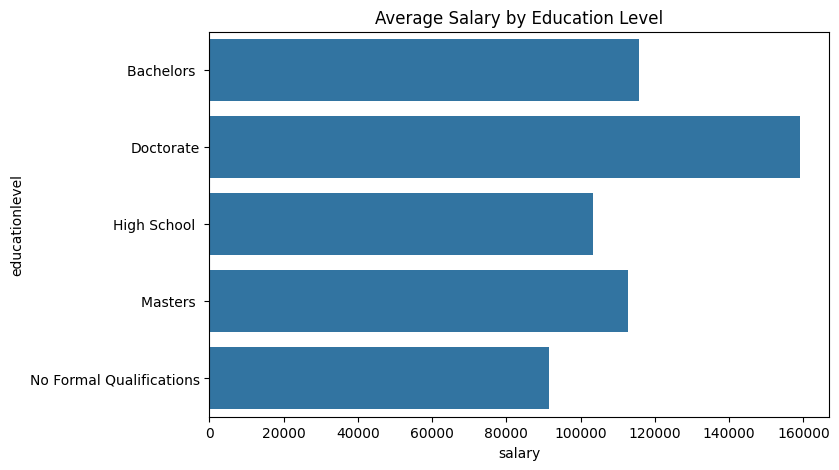

In [ ]:
# Average salary by education level
avg_salary_by_edu = df.groupby('educationlevel')['salary'].mean().reset_index()
print(avg_salary_by_edu)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='salary', y='educationlevel', data=avg_salary_by_edu, ci=None)
plt.title("Average Salary by Education Level")
plt.show()

In [ ]:
# Average salary by gender and job role
gender_pay_gap_role = df.groupby(['jobrole', 'gender'])['salary'].mean().unstack()
print(gender_pay_gap_role)

# Average salary by gender and department
gender_pay_gap_dept = df.groupby(['department', 'gender'])['salary'].mean().unstack()
print(gender_pay_gap_dept)

gender                            Female           Male     Non-Binary  \
jobrole                                                                  
Analytics Manager          325594.320000  371891.000000  380326.964286   
Data Scientist              59980.650930   54128.847430   57320.746988   
Engineering Manager        304307.005988  264288.170455  299074.861111   
HR Business Partner        380561.333333  269338.214286  368704.375000   
HR Executive               105316.666667  101253.703704   88782.600000   
HR Manager                 388146.875000  468185.444444            NaN   
Machine Learning Engineer  131421.113122  135853.776632  136147.783333   
Manager                    338444.400000  334529.888889  205622.000000   
Recruiter                   42849.294737   39304.245283            NaN   
Sales Executive            129693.145234  124496.896978  122851.230303   
Sales Representative        39085.226337   45161.021834   36812.928571   
Senior Software Engineer   136602.2605

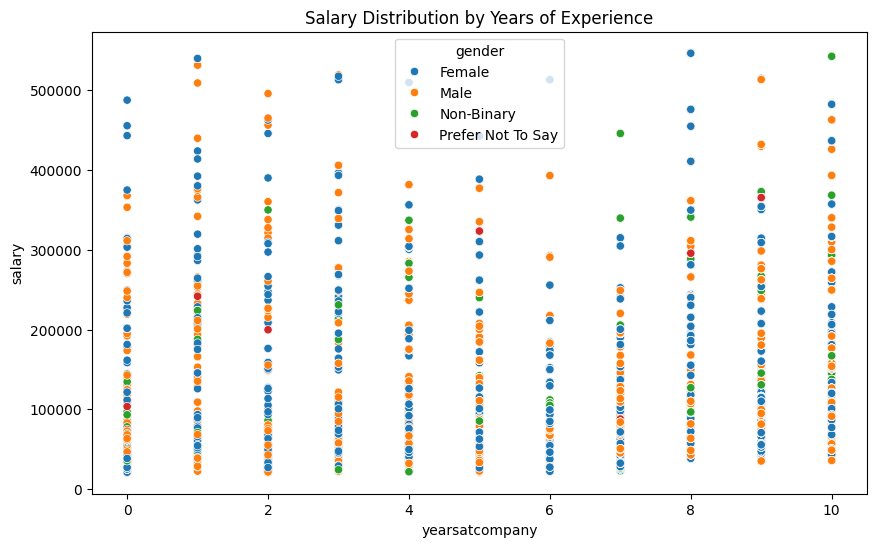

In [ ]:
# Salary distribution by years at company
plt.figure(figsize=(10, 6))
sns.scatterplot(x='yearsatcompany', y='salary', hue='gender', data=df)
plt.title('Salary Distribution by Years of Experience')
plt.show()

In [ ]:
# Highest and lowest average salaries by department
salary_by_dept = df.groupby('department')['salary'].mean().reset_index()
print(salary_by_dept.sort_values('salary', ascending=False))

        department         salary
1            Sales  120568.309815
0  Human Resources  107629.555911
2       Technology  106245.325486


                      jobrole  jobsatisfaction
0           Analytics Manager         3.418269
1              Data Scientist         3.457353
2         Engineering Manager         3.526490
3         HR Business Partner         3.347826
4                HR Executive         3.434783
5                  HR Manager         3.250000
6   Machine Learning Engineer         3.453405
7                     Manager         3.435714
8                   Recruiter         3.469799
9             Sales Executive         3.435897
10       Sales Representative         3.378323
11   Senior Software Engineer         3.356275
12          Software Engineer         3.413043


<ipython-input-57-d3849cebbc8b>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='jobsatisfaction', y='jobrole', data=avg_satisfaction_by_role, ci=None)


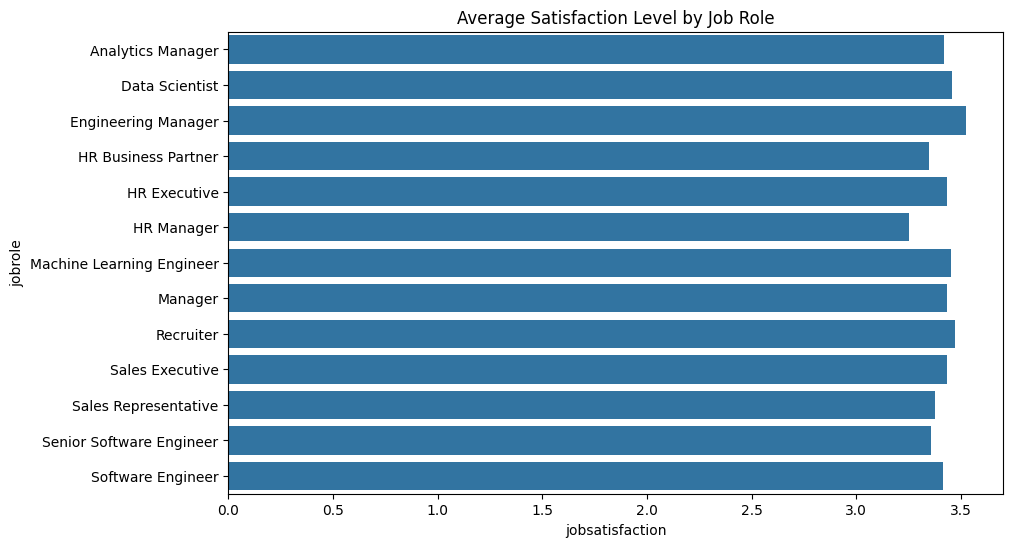

In [ ]:
# Average satisfaction by job role
avg_satisfaction_by_role = df.groupby('jobrole')['jobsatisfaction'].mean().reset_index()
print(avg_satisfaction_by_role)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='jobsatisfaction', y='jobrole', data=avg_satisfaction_by_role, ci=None)
plt.title("Average Satisfaction Level by Job Role")
plt.show()

Correlation between Salary and Job Satisfaction: 0.005305484974307221


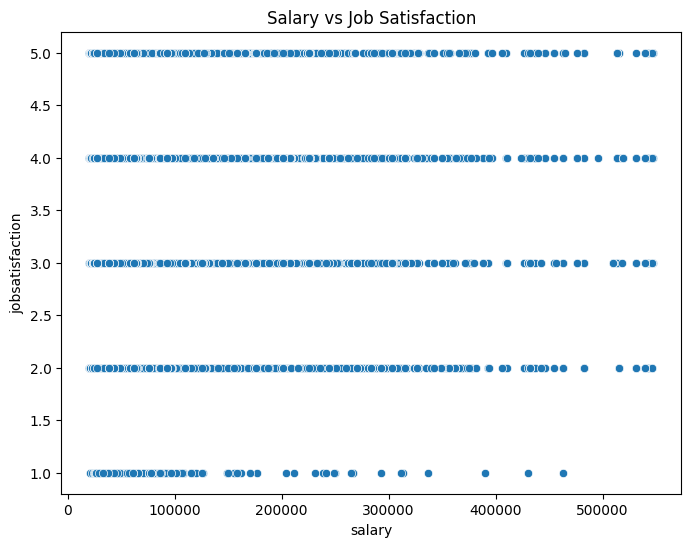

In [ ]:
# Correlation between satisfaction and salary
corr_salary_satisfaction = df['salary'].corr(df['jobsatisfaction'])
print(f"Correlation between Salary and Job Satisfaction: {corr_salary_satisfaction}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='salary', y='jobsatisfaction', data=df)
plt.title('Salary vs Job Satisfaction')
plt.show()

In [ ]:
# Average satisfaction by education level
satisfaction_by_edu = df.groupby('educationlevel')['jobsatisfaction'].mean().reset_index()
print(satisfaction_by_edu)

             educationlevel  jobsatisfaction
0                Bachelors          3.440015
1                 Doctorate         3.298578
2              High School          3.460400
3                  Masters          3.435146
4  No Formal Qualifications         3.377381


In [ ]:
# Average satisfaction by department
satisfaction_by_dept = df.groupby('department')['jobsatisfaction'].mean().reset_index()
print(satisfaction_by_dept.sort_values('jobsatisfaction', ascending=False))

        department  jobsatisfaction
0  Human Resources         3.435644
2       Technology         3.434578
1            Sales         3.422057


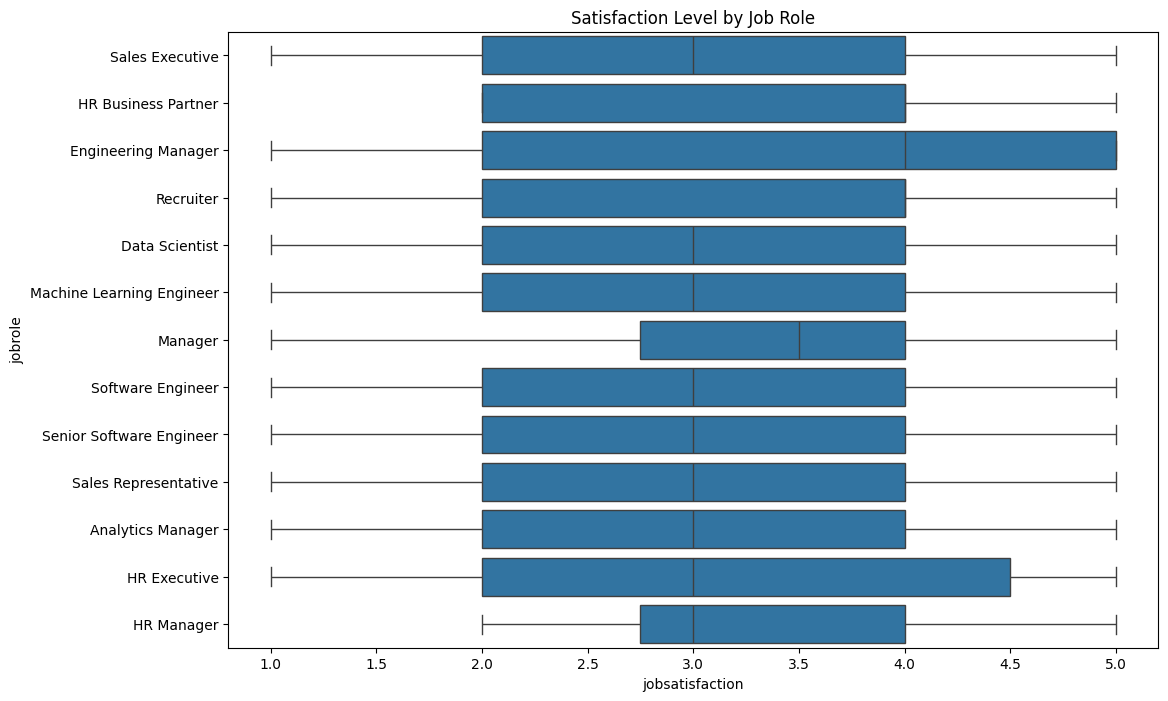

In [ ]:
# Satisfaction level by job role
plt.figure(figsize=(12, 8))
sns.boxplot(x='jobsatisfaction', y='jobrole', data=df)
plt.title('Satisfaction Level by Job Role')
plt.show()

In [ ]:
# Attrition rate
attrition_rate = df['attrition'].value_counts(normalize=True) * 100
print(attrition_rate)

attrition
No     67.227134
Yes    32.772866
Name: proportion, dtype: float64


In [ ]:
# Attrition by department
attrition_by_dept = df.groupby('department')['attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
print(attrition_by_dept.sort_values('attrition', ascending=False))

        department  attrition
1            Sales  39.755767
0  Human Resources  36.741214
2       Technology  28.960000


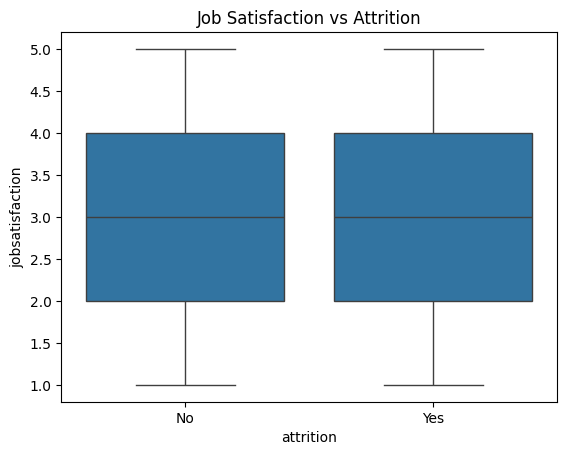

In [ ]:
# Boxplot of job satisfaction vs attrition
sns.boxplot(x='attrition', y='jobsatisfaction', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()

In [ ]:
# Attrition rate by education level
attrition_by_edu = df.groupby('educationlevel')['attrition'].apply(lambda x: (x == 'Yes').mean() * 100).reset_index()
print(attrition_by_edu.sort_values('attrition'))

             educationlevel  attrition
1                 Doctorate  22.018349
2              High School   30.579710
3                  Masters   31.357883
4  No Formal Qualifications  34.655776
0                Bachelors   35.070214


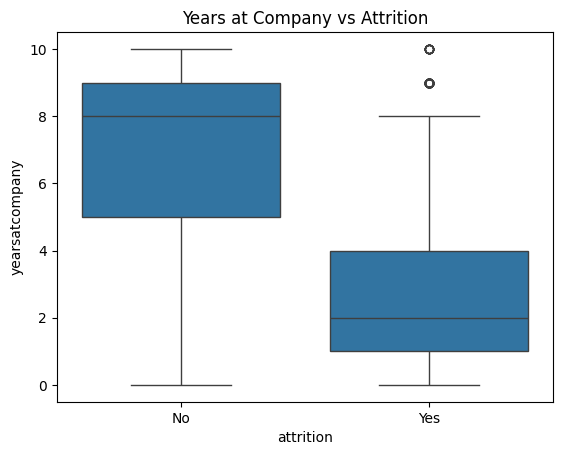

In [ ]:
# Years at company vs attrition
sns.boxplot(x='attrition', y='yearsatcompany', data=df)
plt.title('Years at Company vs Attrition')
plt.show()

In [ ]:
# Average time to promotion
avg_time_to_promotion = df['yearssincelastpromotion'].mean()
print(f"Average years to promotion: {avg_time_to_promotion}")

Average years to promotion: 4.14393390346427


In [ ]:
# Promotion rate by education level
promotion_by_edu = df.groupby('educationlevel')['yearssincelastpromotion'].mean().reset_index()
print(promotion_by_edu)

             educationlevel  yearssincelastpromotion
0                Bachelors                  4.033259
1                 Doctorate                 4.821101
2              High School                  4.659420
3                  Masters                  3.812428
4  No Formal Qualifications                 4.163361


In [ ]:
# Promotion rate by department
promotion_by_dept = df.groupby('department')['yearssincelastpromotion'].mean().reset_index()
print(promotion_by_dept.sort_values('yearssincelastpromotion'))

        department  yearssincelastpromotion
1            Sales                 3.843510
0  Human Resources                 3.996805
2       Technology                 4.306286


In [ ]:
# Promotion rate for highly satisfied employees
satisfied_employees = df[df['jobsatisfaction'] > df['jobsatisfaction'].median()]
promotion_rate = (satisfied_employees['yearssincelastpromotion'] == 0).mean() * 100
print(f"Promotion rate for satisfied employees: {promotion_rate:.2f}%")

Promotion rate for satisfied employees: 18.04%


In [ ]:
# Promotion rate by gender
promotion_by_gender = df.groupby('gender')['yearssincelastpromotion'].mean().reset_index()
print(promotion_by_gender)

              gender  yearssincelastpromotion
0             Female                 4.297383
1               Male                 3.900589
2         Non-Binary                 4.533113
3  Prefer Not To Say                 4.484848


In [ ]:
# Save analysis results to Excel
output_path = "/DOC-20250304-WA0001..xlsx"

with pd.ExcelWriter(output_path) as writer:
    avg_salary_by_edu.to_excel(writer, sheet_name="Salary by Education")
    salary_by_dept.to_excel(writer, sheet_name="Salary by Department")
    attrition_by_dept.to_excel(writer, sheet_name="Attrition by Department")
    promotion_by_dept.to_excel(writer, sheet_name="Promotion by Department")

print(f"HR analysis results saved to: {output_path}")

HR analysis results saved to: /DOC-20250304-WA0001..xlsx
